In [14]:
from sklearn import tree
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\pmaxl\\OneDrive\\Desktop\\FinalGroup\\Resources\\team_summary.csv")
df.head()

,W/L,Fighter,Tank,Mage,Assassin,Support,Marksman,vs Fighter,vs Tank,vs Mage,vs Assassin,vs Support,vs Marksman
0,w,1.0,1.5,0.5,0.5,0.5,1.0,1.5,1.0,0.5,1.0,0.5,0.5
1,l,1.5,1.0,0.5,1.0,0.5,0.5,1.0,1.5,0.5,0.5,0.5,1.0
2,w,1.5,0.5,1.0,1.0,0.5,0.5,1.5,1.0,0.0,1.0,0.5,1.0
3,l,1.5,1.0,0.0,1.0,0.5,1.0,1.5,0.5,1.0,1.0,0.5,0.5
4,w,1.5,1.5,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0


In [6]:
target = df["W/L"]
target_names = ["w", "l"]

In [7]:
data = df.drop("W/L", axis=1)
feature_names = data.columns
data.head()

,Fighter,Tank,Mage,Assassin,Support,Marksman,vs Fighter,vs Tank,vs Mage,vs Assassin,vs Support,vs Marksman
0,1.0,1.5,0.5,0.5,0.5,1.0,1.5,1.0,0.5,1.0,0.5,0.5
1,1.5,1.0,0.5,1.0,0.5,0.5,1.0,1.5,0.5,0.5,0.5,1.0
2,1.5,0.5,1.0,1.0,0.5,0.5,1.5,1.0,0.0,1.0,0.5,1.0
3,1.5,1.0,0.0,1.0,0.5,1.0,1.5,0.5,1.0,1.0,0.5,0.5
4,1.5,1.5,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6827586206896552

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6689655172413793

In [11]:
chart = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [12]:
chart

[(0.10157987262245509, 'Assassin'),
 (0.09605828366267917, 'vs Mage'),
 (0.09529863896287863, 'vs Assassin'),
 (0.09037647691876205, 'Mage'),
 (0.08876609516232135, 'vs Tank'),
 (0.08297066521797898, 'vs Fighter'),
 (0.08016103407325527, 'Fighter'),
 (0.07804620166882235, 'Tank'),
 (0.0762727763897741, 'vs Marksman'),
 (0.07383508812228547, 'Marksman'),
 (0.0696732897758208, 'vs Support'),
 (0.06696157742296678, 'Support')]

In [12]:
chart_df=pd.DataFrame(chart)

chart_df.to_csv(r'C:\Users\Logan\Desktop\bootcamp\FinalGroup\data_lol\Match_prediction.csv',index = False, header= True)

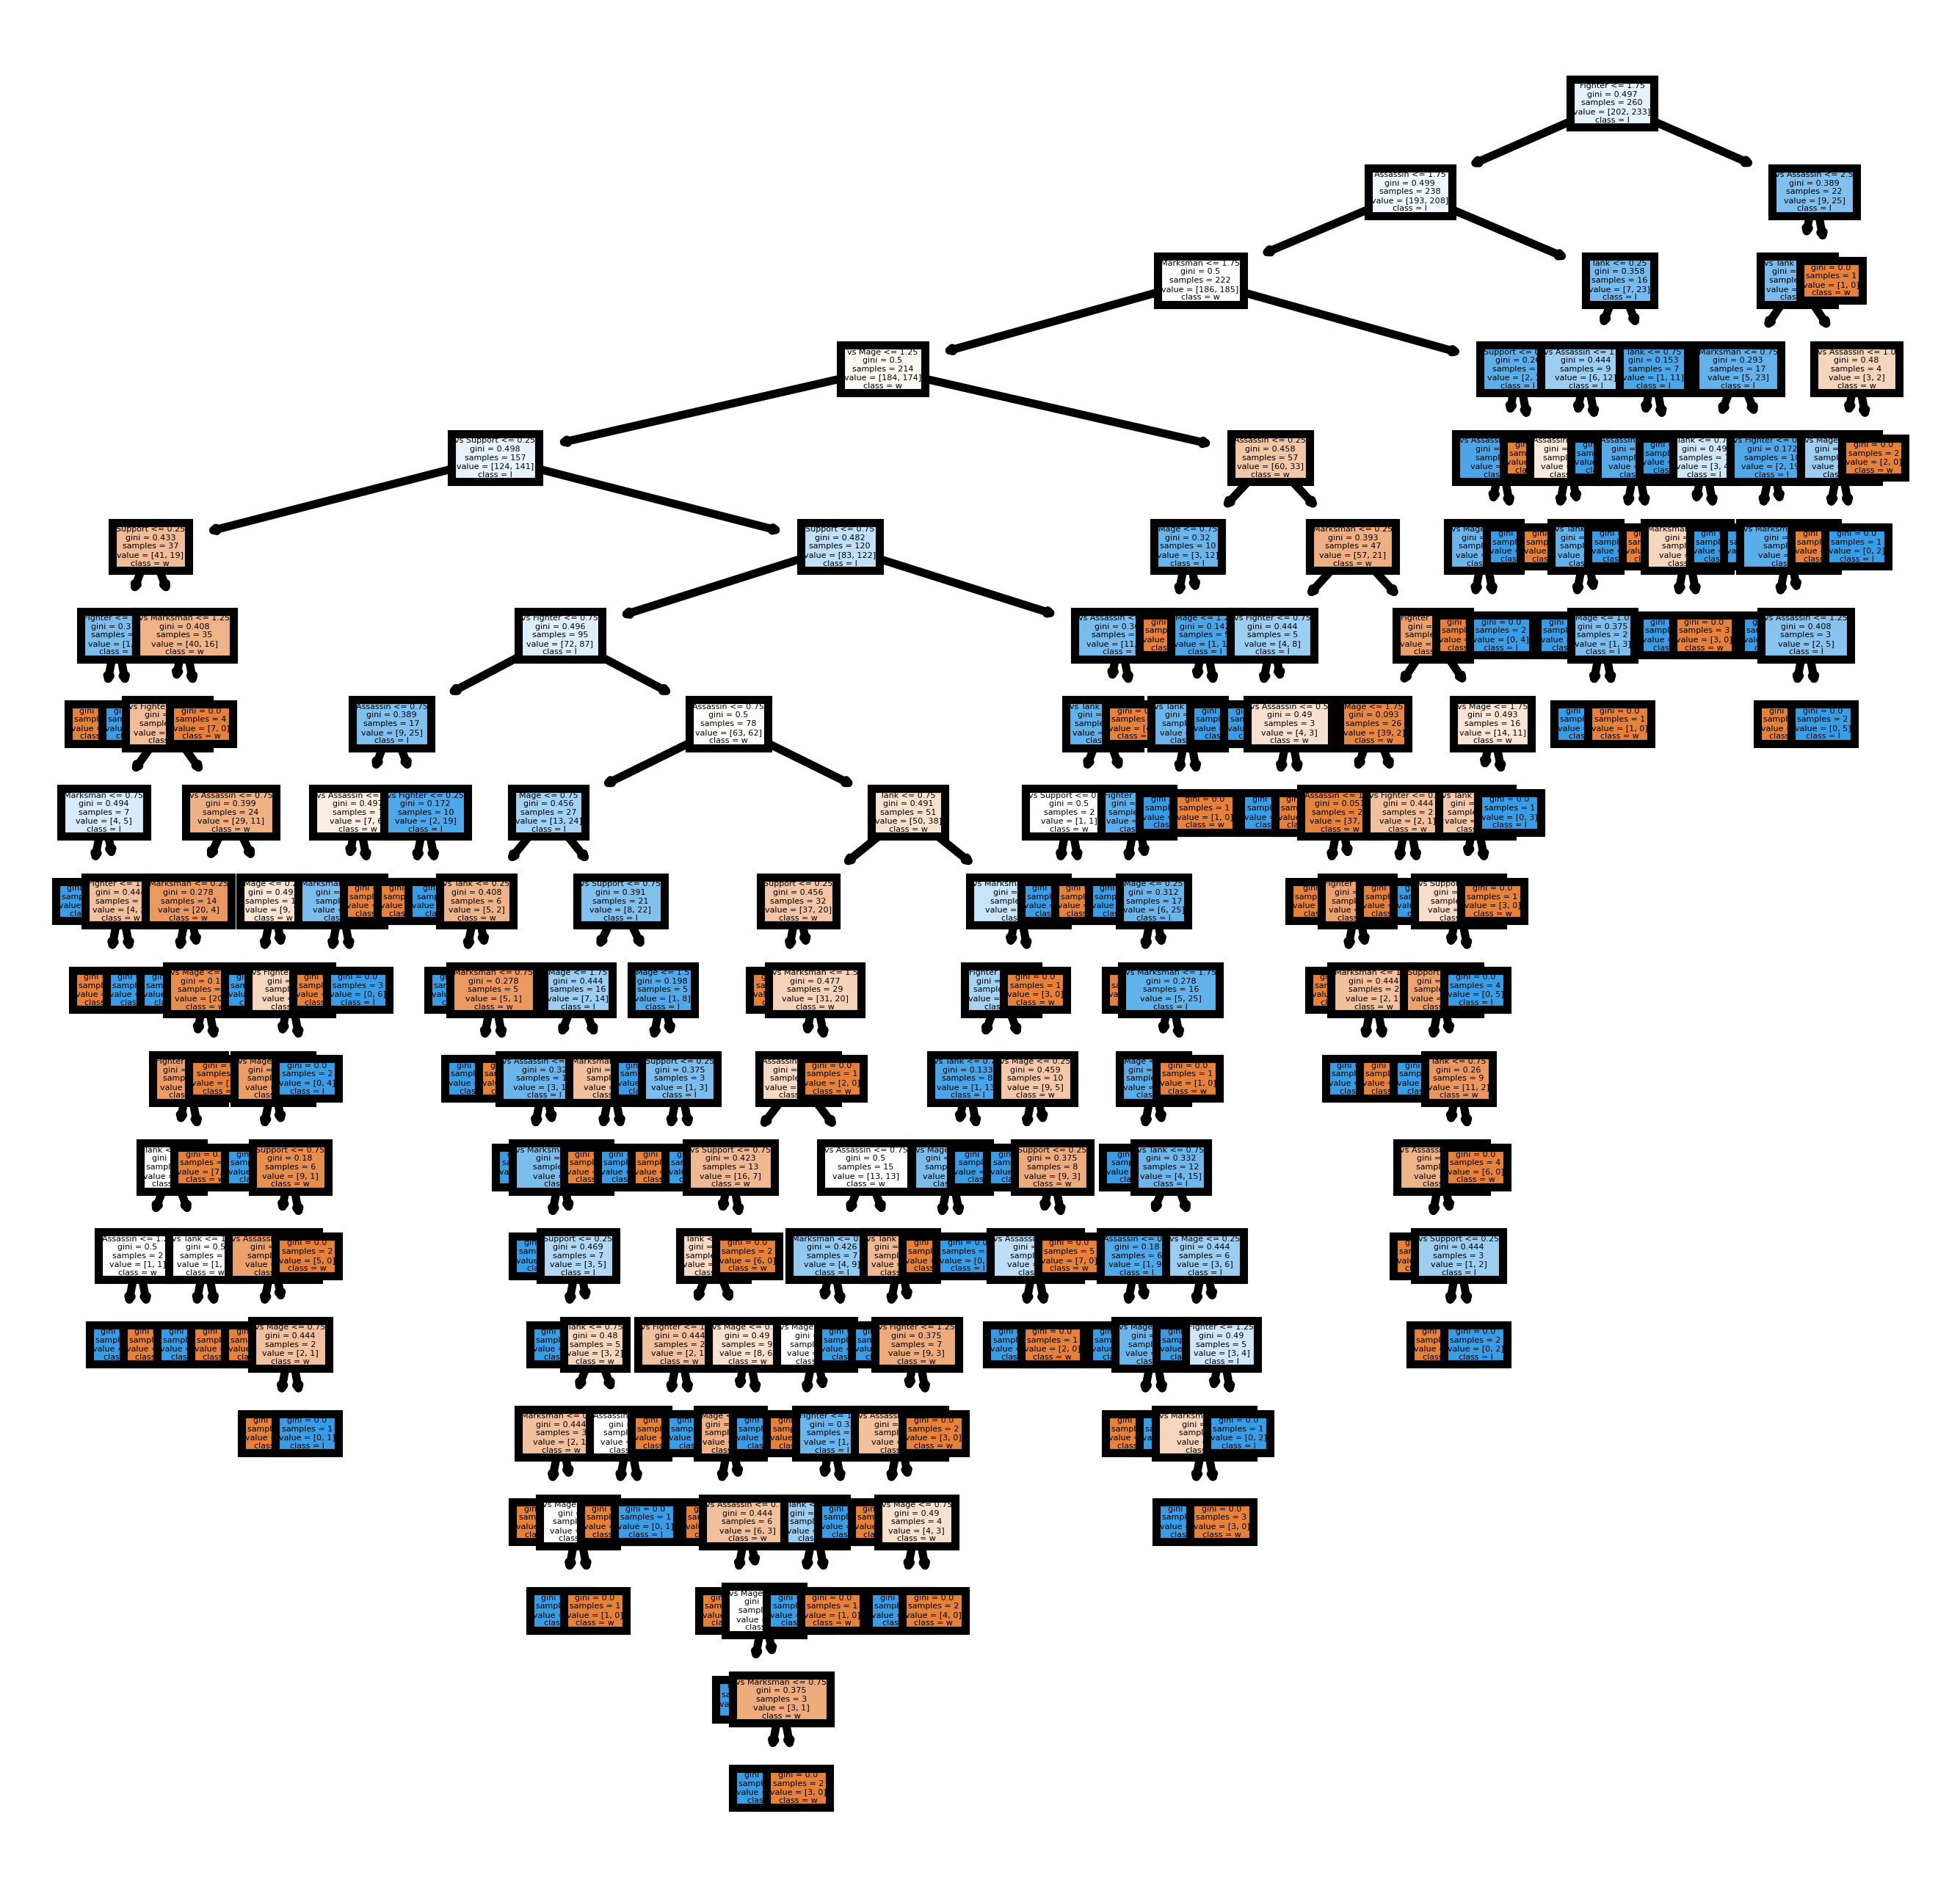

In [16]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_tree.png')